# PHYS 210 Mini-Project 03
### Ferromagneticsm
Due Wed, Nov 23, 2022 - 9am

#### Project objective

Explore the Curie temperature and the Ising model of Ferromagnetism

#### Before getting started

* Read the Mini-Project 03 background handout in the same folder as this notebook. It provides all the details.

In [1]:
# Main code here - generate plots and animations in individual cells below.
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

T = np.array([0.01, 0.1, 1, 2, 3, 4, 5, 10,
              100])  # array of temperatures to simulate
possible_spins = np.array([1, -1])  # array of possible spins
size = 50  # size of grid = 50 x 50
iteration_per_T = 5  # repeat the simulation 5 times per temperature
converging_iterations = 600000  # system converges after 600000 iterations


def lattice_energy(spins):
    """
    Function to calculate the energy of the lattice using the model
    input: spins = square lattice of electrons
    H(sigma) = -J/2 \sum_i^N \sum_j^N  \sigma_{i,j} * neighbor_sum
    neighbor_sum = \sigma_{i-1,j} + \sigma_{i+1,j}
    + \sigma_{i,j-1} + \sigma_{i,j+1}
    """
    H = 0  # energy of the lattice H(σ)
    for i in range(len(spins)):
        for j in range(len(spins[0])):
            # if the index is out of range
            # go to the other end of the lattice
            neighbor_sum = 0
            if i + 1 < len(spins):
                neighbor_sum += spins[i + 1, j]
            else:
                neighbor_sum += spins[0, j]
            if j + 1 < len(spins[0]):
                neighbor_sum += spins[i, j + 1]
            else:
                neighbor_sum += spins[i, 0]
            H += spins[i, j] * neighbor_sum
    H = -0.5 * H

    # returns energy and neighbor sum for lattice_energy2(...)
    return H, neighbor_sum


def lattice_energy2(arr, energy, loc, neighbor_sum):
    """
    Function to calculate the energy of the new lattice
    the new energy can be calculated by
    (E1 * 1/(-J/2) - 2
    *(flipped electron spin * neighbor sum))
    *(-J/2) where J = 1
    returns the energy of the new lattice
    """
    energy2 = energy * (-2) - 2 * arr[loc[0], loc[1]] * neighbor_sum
    energy2 = energy2 * (-0.5)
    return energy2


def random_flip(arr):
    """
    Flips the spin of a random electron at loc in arr
    Returns the location of the flipped electron
    """
    random_row = np.random.randint(0, len(arr))
    random_column = np.random.randint(0, len(arr[0]))
    arr[random_row, random_column] *= -1
    return [random_row, random_column]


def start_simulation(Temperature):
    """
    1.  create a new lattice
    2.  copy the lattice to lattice2
    3.  flip an electron on lattice2
    4.  if energy2 < energy, accept lattice2
        (energy = energy of lattice, energy = energy of lattice 2)
    5. generate a random num: 0 < num < 1 if energy2 > energy
    6. compare probability P = P(lattice2) / P(lattice) and random num
    7. accept lattice2 if random num <= P
    8. reject the lattice2 if random num > P
    9. repeat the steps above from step 2 for 600000 times
    (assume the system converges after 600000 iterations)
    Accpet the lattice by appending lattice2 to a list of lattices
        and upadate lattice to lattice2
    """
    # create a new 50x50 array of electrons with random spin (1 or -1)
    lattice = np.random.choice(possible_spins, size * size).reshape(size, size)
    lattices = []  # list of lattices
    lattices.append(lattice)
    E1, neighbor_sum = lattice_energy(lattice)

    for i in range(converging_iterations):
        # copy the lattice to a new lattice so
        # the original lattice won't be affected
        lattice2 = np.copy(lattice)
        # flip the spin of a random electron in the new lattice
        loc = random_flip(lattice2)
        E2 = lattice_energy2(lattice, E1, loc, neighbor_sum)
        if E2 < E1:
            # accept new lattice if E2 < E
            lattice = lattice2
            lattices.append(lattice)
            E1 = E2
        else:
            random_num = np.random.random_sample()
            P = np.exp((E1 - E2) / Temperature)
            if random_num <= P:
                # accept new lattice if E2 > E and random_num <= P
                lattice = lattice2
                lattices.append(lattice)
                E1 = E2
            else:
                # reject new lattice if E2 > E and random_num > P
                pass
    # returns a list of lattices containing the evolution of the system
    return lattices


def magnetic_moment(arr):
    """
    calculate the magnetic moment of the system in arr
    M = mu/N \sum_i^N \sigma_i = mu * mean of arr
    when mu = 1, M = mean of arr
    """
    return np.mean(arr)  # returns the magnatic moment of the lattice


def anim(T, step):
    """
    Function used to animate the system of electrons
    input T: set the temperature of the system
       Step: set the step between each frame to animate
    Saves the animation created in current directory
    """
    fig = plt.figure(figsize=(8, 6))  # Create a new figure
    plt.title("Evolution of the lattice of electrons")
    ims = []  # List to store our grids of random numbers
    lattices = start_simulation(T)

    # append frames to ims
    for data in lattices[0:len(lattices):step]:
        img = plt.pcolormesh(data, cmap="binary_r")
        ims.append((img, ))  # each image added as a tuple

    # Animate frames stored in ims
    imani = animation.ArtistAnimation(
        fig,  # Not used here, but would be needed for resizing, etc
        ims,  # The list to animate
        repeat_delay=10)

    plt.colorbar(img)
    imani.save('Lattice_Evolution_{temp}_.gif'.format(temp=T),
               writer=animation.PillowWriter(fps=60))
    plt.close()  # Prevents a stray plot from appearing
    del ims  # Release crucial Cocal memory related to these objects
    del imani  #

    HTML('<img src="random.gif">')
    return

Curie Temperature is about 1.5K


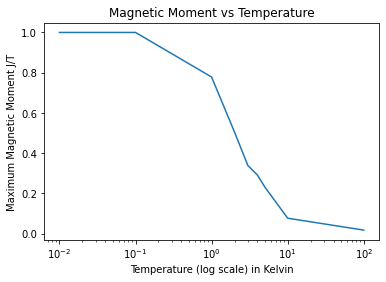

In [2]:
# Generate Deliverable 1 here: Plot of M vs T
# YOUR CODE HERE
M_arr = []
for temp in T:  # loop through each temperature
    M_for_Temp = []
    for i in range(iteration_per_T):  # repeat simulation 5 times
        lattices = start_simulation(temp)
        converged_lattice = lattices[-1]
        M_for_Temp.append(abs(magnetic_moment(converged_lattice)))
    M = max(M_for_Temp)  # find magnetic moment
    # create a list of magnetic moment for different temperatures
    M_arr.append(M)

print("Curie Temperature is about 1.5K")

# make plot
plt.plot(T, M_arr)
plt.xscale("log")
plt.xlabel("Temperature (log scale) in Kelvin")
plt.ylabel("Maximum Magnetic Moment J/T")
plt.title("Magnetic Moment vs Temperature")
plt.show()
plt.close()

In [3]:
# Generate Deliverable 2.1 here: Animation for T = 0.1
# YOUR CODE HERE
anim(0.1, 2000)

In [4]:
# Generate Deliverable 2.2 here: Animation for T = 2.5
# YOUR CODE HERE
anim(2.5, 2000)

In [5]:
# Generate Deliverable 2.3 here: Animation for T = 100
# YOUR CODE HERE
anim(100, 2000)

# Acknowledgements

In the cell below, please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook.

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."


_Acknowledgements here:_



# Extension Code and Description
All solution code for the main project question should appear in the cell "cell-project1-main" above. Project extensions go in the cell "cell-extension" immediately below and the descriptions of your extension go in the cell below that.

In [6]:
# OPTIONAL project extension here
# These can call functions in your code above if desired
# YOUR CODE HERE


_In this cell, please describe any new language features or project extension you have implemented:_




# Grading cells
The cells below marked as "grade use only" are created as placeholders so that we can provide a manual grade and comments for each category. 

Exceptions are the "2. Style" test, which has an associated autograder test that you can run to check style and the timing cell "cell-optimization0", which you can use to test your code execution time.

In [7]:
# 1. Code execution (grader use only)

In [8]:
# 2. Style: pep8 (see note below regarding use of the Format button to fix many errors)
#
# Tests for pep8 returns warnings or errors. You may need to hit 'Save' after making changes for them to take effect.
nb_name = "project03.ipynb"
cells_to_check = []
stop_at = ['cell-extension']
# check_style2.py uses cells_to_check and nb_name
%run -i check_style2.py

checking cell: cell-project3-1
checking cell: cell-project3-2
checking cell: cell-project3-3
checking cell: cell-project3-4
checking cell: cell-project3-5


Also note that you can use the Format button while in a code cell to automagically fix most pep8 errors (other than way too long print statements)

![](project02-format.png)

In [9]:
# 3. Results (grader use only)

In [10]:
# 4. Readability (grader use only)


In [11]:
# 5. Plot (grader use only)

In [12]:
# Check execution time
nb_name = "project03.ipynb"
cells_to_time = []
stop_at = ['cell-extension']
%run -i time_cells2.py

Time for cell: cell-project3-1 time: 0.00


In [ ]:
# 5. Code optimization/timing (grader use only)


In [ ]:
# B2. New Functionality/Language features (grader use only)